<a href="https://colab.research.google.com/github/MohammedQaraad/DeepleerningTF/blob/master/elasticNet_Vs_elasticNetCv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tarfile
import pandas as pd
from sklearn.externals import joblib
import numpy as np
import matplotlib.pyplot as plt
import sys
import time
from sklearn.model_selection import  train_test_split, LeaveOneOut
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet, Lasso , ElasticNetCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from math import sqrt
import itertools


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
file='/content/drive/My Drive/Colab Notebooks/data/singh.tar.gz'
datasetname='singh'

In [0]:
min_max_scaler = MinMaxScaler()
with tarfile.open(file, "r:*") as tar:
    csv_path = tar.getnames()
    labels = pd.read_csv(tar.extractfile(csv_path[1]), header=None)
    feature = pd.read_csv(tar.extractfile(csv_path[0]), header=None)
headers = list(feature.columns)
feature.fillna(0, inplace = True)
features = np.asarray(feature.values)
features = min_max_scaler.fit_transform(feature)
labels = np.transpose(np.asarray(labels.values.ravel() - 1, dtype=int))

In [110]:
features.shape, labels.shape

((102, 12600), (102,))

Multi Layer Perceptron 
# MLP Classification 

In [43]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

1.15.0


In [128]:
#gains = np.asarray(np.loadtxt('/content/drive/My Drive/Colab Notebooks/NewElasticNet_Cv_result/singh_lasso.txt'))
#indexes = np.where(gains != 0)[0]

#gains = np.asarray(np.loadtxt('/content/drive/My Drive/Colab Notebooks/NewElasticNet_Cv_result/singh_elasticNet.txt'))
#indexes = np.where(gains != 0)[0]

gains = np.asarray(np.loadtxt('/content/drive/My Drive/Colab Notebooks/NewElasticNet_Cv_result/singh_elasticNetCV.txt'))
indexes = np.where(gains != 0)[0]
print(gains.shape)
print(indexes.shape)

(12600,)
(169,)


In [0]:


scores = []

loo = LeaveOneOut()

startTime = time.time()

for train_index, test_index in loo.split(features):
	x_train, x_test = features[train_index], features[test_index]
	y_train, y_test = labels[train_index], labels[test_index]
	
	X_train = x_train[:, indexes]
	X_test = x_test[:, indexes]
	Y_train = y_train[:]
	Y_test = y_test[:]
	
	batch_size = 1
	num_classes = np.max(labels) + 1
	epochs = 50
	
	X_train = X_train.astype('float32')
	X_test = X_test.astype('float32')
	Y_train = Y_train[:]
	Y_test = Y_test[:]

	
	# convert class vectors to binary class matrices
	Y_train = tf.keras.utils.to_categorical(Y_train, num_classes)
	Y_test = tf.keras.utils.to_categorical(Y_test, num_classes)
#print(X_train.shape[0], 'train samples, ', Y_train.shape)
#print(X_test.shape[0], 'test samples, ', Y_test.shape)

In [0]:
sgd = tf.keras.optimizers.SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(200,input_dim=X_train.shape[1], activation=tf.nn.relu, kernel_initializer='lecun_uniform'),
    tf.keras.layers.Dense(100, activation=tf.nn.relu,kernel_initializer='lecun_uniform'),
    tf.keras.layers.Dense(Y_train.shape[1], kernel_initializer='lecun_uniform', activation=tf.nn.softmax)
])

model.compile(optimizer='Adamax', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [131]:
history = model.fit(X_train, Y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
	
scores.append(score[1])

endTime = time.time()


with open('/content/drive/My Drive/Colab Notebooks/New Mlp Result/' + datasetname + '_mlp_' + 'elasticNetCV' + '.txt', 'w') as file:
	file.write('Score: ' + str(np.average(scores)) + '\n')
	file.write('Time: ' + str(endTime - startTime))
	file.close()

print('Score: ' + str(np.average(scores)))
print('Time: ' + str(endTime - startTime))

Score: 1.0
Time: 22.73926067352295


# Gene  Selection  

In [39]:
#Lasso and Elasticnet and ElasticNetCV coefficient 
alpha = 0.001
#Lasso
lasso = Lasso(alpha=alpha)
lasso.fit(features,labels)
np.savetxt('/content/drive/My Drive/Colab Notebooks/NewElasticNet_Cv_result/' +datasetname+ '_lasso.txt', lasso.coef_)
#elasticNet
elasticNet = ElasticNet(alpha=alpha, l1_ratio=0.7)
elasticNet.fit(features,labels)
np.savetxt('/content/drive/My Drive/Colab Notebooks/NewElasticNet_Cv_result/' +datasetname+ '_elasticNet.txt', elasticNet.coef_)

#ElasticNetCV
elasticNetCv = ElasticNetCV(cv=5, random_state=0)
elasticNetCv.fit(features,labels)
np.savetxt('/content/drive/My Drive/Colab Notebooks/NewElasticNet_Cv_result/' +datasetname+ '_elasticNetCV.txt', elasticNetCv.coef_)

Lasso_coef= lasso.coef_[lasso.coef_ != 0]
elasticNet_coef=elasticNet.coef_[elasticNet.coef_ !=0]
elasticNetCV_coef=elasticNetCv.coef_[elasticNetCv.coef_ !=0]

print(datasetname + " Coefficients \n Lasso Coef = {}\n ElasticNet coef= {}\n ElasticNetCV coef = {}",Lasso_coef.shape, elasticNet_coef.shape, elasticNetCV_coef.shape )



chin Coefficients 
 Lasso Coef = {}
 ElasticNet coef= {}
 ElasticNetCV coef = {} (112,) (143,) (28,)


# Lasso Vs ElasticNet vs ElasticNetCV Test

In [8]:
X_train,x_test,y_train,y_test= train_test_split(features,labels,test_size=0.3, 
                                                random_state=1,stratify=labels)
print(np.array(np.unique(y_train, return_counts=True)).T)
print(np.array(np.unique(y_test, return_counts=True)).T)

print("y_train class distribution ", pd.value_counts(y_train))
print("y_test class distribution ", pd.value_counts(y_test))

#Lasso

[[ 0 30]
 [ 1 52]]
[[ 0 13]
 [ 1 23]]
y_train class distribution  1    52
0    30
dtype: int64
y_test class distribution  1    23
0    13
dtype: int64


In [9]:
alpha = 0.001
#Lasso
lasso = Lasso(alpha=alpha)

lasso.fit(X_train,y_train)
y_pred_lasso= lasso.predict(x_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.492970


In [10]:
#elasticNet
elasticNet = ElasticNet(alpha=alpha, l1_ratio=0.7)
y_pred_enet = elasticNet.fit(X_train, y_train).predict(x_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(elasticNet)
print("r^2 on test data : %f" % r2_score_enet)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.7,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.456384


In [12]:
#ElasticNetCV
elasticNetCv = ElasticNetCV(cv=5, random_state=0)
y_pred_enetCv = elasticNetCv.fit(X_train, y_train).predict(x_test)
r2_score_enetCv = r2_score(y_test, y_pred_enetCv)
print(elasticNetCv)
print("r^2 on test data : %f" % r2_score_enetCv)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto', random_state=0,
             selection='cyclic', tol=0.0001, verbose=0)
r^2 on test data : 0.566343


In [0]:
alpha = 0.001
#lasso = Lasso(alpha=alpha)
# ElasticNet
elasticNet = ElasticNet(alpha=alpha, l1_ratio=0.7)
#ElasticNetCV
elasticnetCv = ElasticNetCV(cv=5, random_state=0, l1_ratio=0.7)

## Ploting Coefficients 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02030608047256115, tolerance: 0.0025490196078431374
  positive)


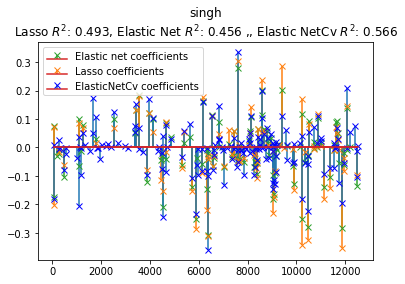

In [135]:
file='/content/drive/My Drive/Colab Notebooks/data/singh.tar.gz'
datasetname='singh'

min_max_scaler = MinMaxScaler()
with tarfile.open(file, "r:*") as tar:
    csv_path = tar.getnames()
    labels = pd.read_csv(tar.extractfile(csv_path[1]), header=None)
    feature = pd.read_csv(tar.extractfile(csv_path[0]), header=None)
headers = list(feature.columns)
feature.fillna(0, inplace = True)
features = np.asarray(feature.values)
features = min_max_scaler.fit_transform(feature)
labels = np.transpose(np.asarray(labels.values.ravel() - 1, dtype=int))


#Lasso and Elasticnet and ElasticNetCV coefficient 
alpha = 0.001
#Lasso
lasso = Lasso(alpha=alpha)
lasso.fit(features,labels)
#elasticNet
elasticNet = ElasticNet(alpha=alpha, l1_ratio=0.7)
elasticNet.fit(features,labels)

#ElasticNetCV
elasticNetCv = ElasticNetCV(cv=5, random_state=0)
elasticNetCv.fit(features,labels)



m, s, _ = plt.stem(np.where(elasticNet.coef_)[0], elasticNet.coef_[elasticNet.coef_ != 0],
                   markerfmt='x', label='Elastic net coefficients',
                   use_line_collection=True)
plt.setp([m, s], color="#2ca02c")
m, s, _ = plt.stem(np.where(lasso.coef_)[0], lasso.coef_[lasso.coef_ != 0],
                   markerfmt='x', label='Lasso coefficients',
                   use_line_collection=True)
plt.setp([m, s], color='#ff7f0e')
plt.stem(np.where(elasticNetCv.coef_)[0], elasticNetCv.coef_[elasticNetCv.coef_ != 0], label='ElasticNetCv coefficients',
         markerfmt='bx', use_line_collection=True)

plt.legend(loc='best')
plt.title(datasetname + "\nLasso $R^2$: %.3f, Elastic Net $R^2$: %.3f ,, Elastic NetCv $R^2$: %.3f"
          % (r2_score_lasso, r2_score_enet, r2_score_enetCv))
plt.show()
